# library

In [ ]:
#!pip install pydicom
import pandas as pd
import pydicom
import os
from matplotlib import pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.3 MB/s eta 0:00:00


# ouvrir une image

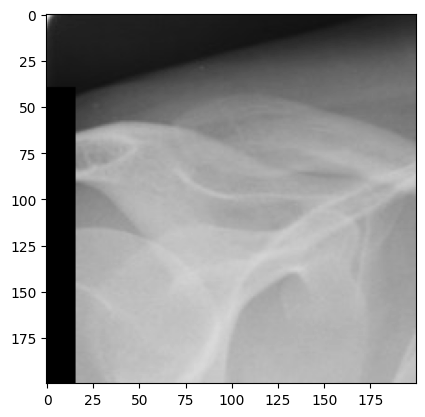

In [ ]:
im = plt.imread('1.2.276.0.7230010.3.1.4.8323329.10017.1517875220.530.png')
im.shape
plt.imshow(im)
plt.imshow(im[0:200,0:200], cmap="gray")

Help on function imshow in module matplotlib.pyplot:

imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image, set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
  

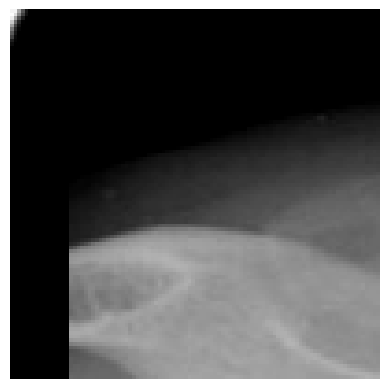

In [ ]:
path2Image = '1.2.276.0.7230010.3.1.4.8323329.10017.1517875220.530.png'
im2 = plt.imread(path2Image)

plt.imshow(im2[0:100, 0:100] , cmap="gray", vmin=0.2, vmax=1)
plt.axis('off')
help(plt.imshow)

# ouvrir une image dcm

In [ ]:
# Get ref file
path2ImageDCM = '1.2.276.0.7230010.3.1.4.8323329.10017.1517875220.530.dcm'

# Use dcmread instead of read_file
RefDs = pydicom.dcmread(path2ImageDCM)
RefDs

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 198
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.10017.1517875220.530
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.10017.1517875220.530
(0008,0020) Study Date                          DA: '19010101'
(0008,0030) Study Time                        

L'image possède 1024 x 1024 pixels
Help on function imshow in module matplotlib.pyplot:

imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image, set up the colormapping using the parameters
    ``cmap=

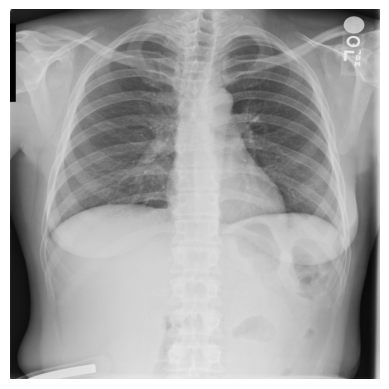

In [ ]:
##alternative
#ds = pydicom.dcmread(lstFilesDCM[0])


data = RefDs.pixel_array
print("L'image possède {} x {} pixels".format(data.shape[0],
                                            data.shape[1]))

plt.imshow(data , cmap="gray", vmin=0, vmax=255)
plt.axis('off')
help(plt.imshow)

# ouvrir plusieurs images

In [ ]:
# lire plusieurs images
PathDicom = 'explDir'

lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))


lstFilesDCM

# Use dcmread instead of read_file to read DICOM files
imgL = [pydicom.dcmread(x) for x in lstFilesDCM]
imgL[0]

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 202
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.32712.1517875161.923428
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.32712.1517875161.923428
(0008,0020) Study Date                          DA: '19010101'
(0008,0030) Study Time                  

# lire le fichier csv

In [ ]:
path2csv = 'trainSet-rle.csv'

dtf = pd.read_csv(path2csv, delimiter=';')

dtf.describe()
dtf['ImageId'][0]

'1.2.276.0.7230010.3.1.4.8323329.5597.1517875188.959090'

In [ ]:
#extraire des metadata
elem = RefDs['SOPInstanceUID']
print(elem)

(0008,0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.10017.1517875220.530


L'image possède 128 x 128 pixels


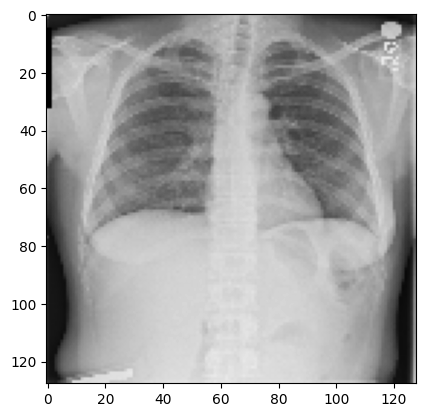

In [ ]:
#downsizer les images
data_downsampling = data[::8, ::8]
print("L'image possède {} x {} pixels".format(data_downsampling.shape[0],
                                            data_downsampling.shape[1]))

plt.imshow(data_downsampling , cmap="gray", vmin=0, vmax=255)